Importing Libraries
For loading, Analysing, observing and preprocesing

In [ ]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Tuning our Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

**Loading and Visualizing the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/CarPrice_Assignment.csv')

Display the top 5 value

In [ ]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Cheacking no. of row and columns in the dataset

In [ ]:
df.shape

(205, 26)

Checking Null values in dataset

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

getting some info about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Getting to know about scaler value of the unique count by index

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

Sperate the CarName single column into 2 columns 

In [ ]:
df["Company"]=df['CarName'].apply(lambda x:x.split(" ")[0])
df["Company"]=df['Company'].apply(lambda x:x.lower())

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Company name in database

In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Replacing the short company name by correcting it

In [ ]:
df['Company'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','volkswagen':'vokswagen','vw':'vokswagen'},inplace=True)

Rechecking company name

In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volvo'], dtype=object)

Replace the car_ID and CarName columns

In [ ]:
df.drop(['car_ID','CarName'],axis=1, inplace=True)

In [ ]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Sperating Name and value(both int and flot into same category)

In [ ]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']

In [ ]:
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [ ]:
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company']

In [ ]:
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Analyzing and Viewing 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

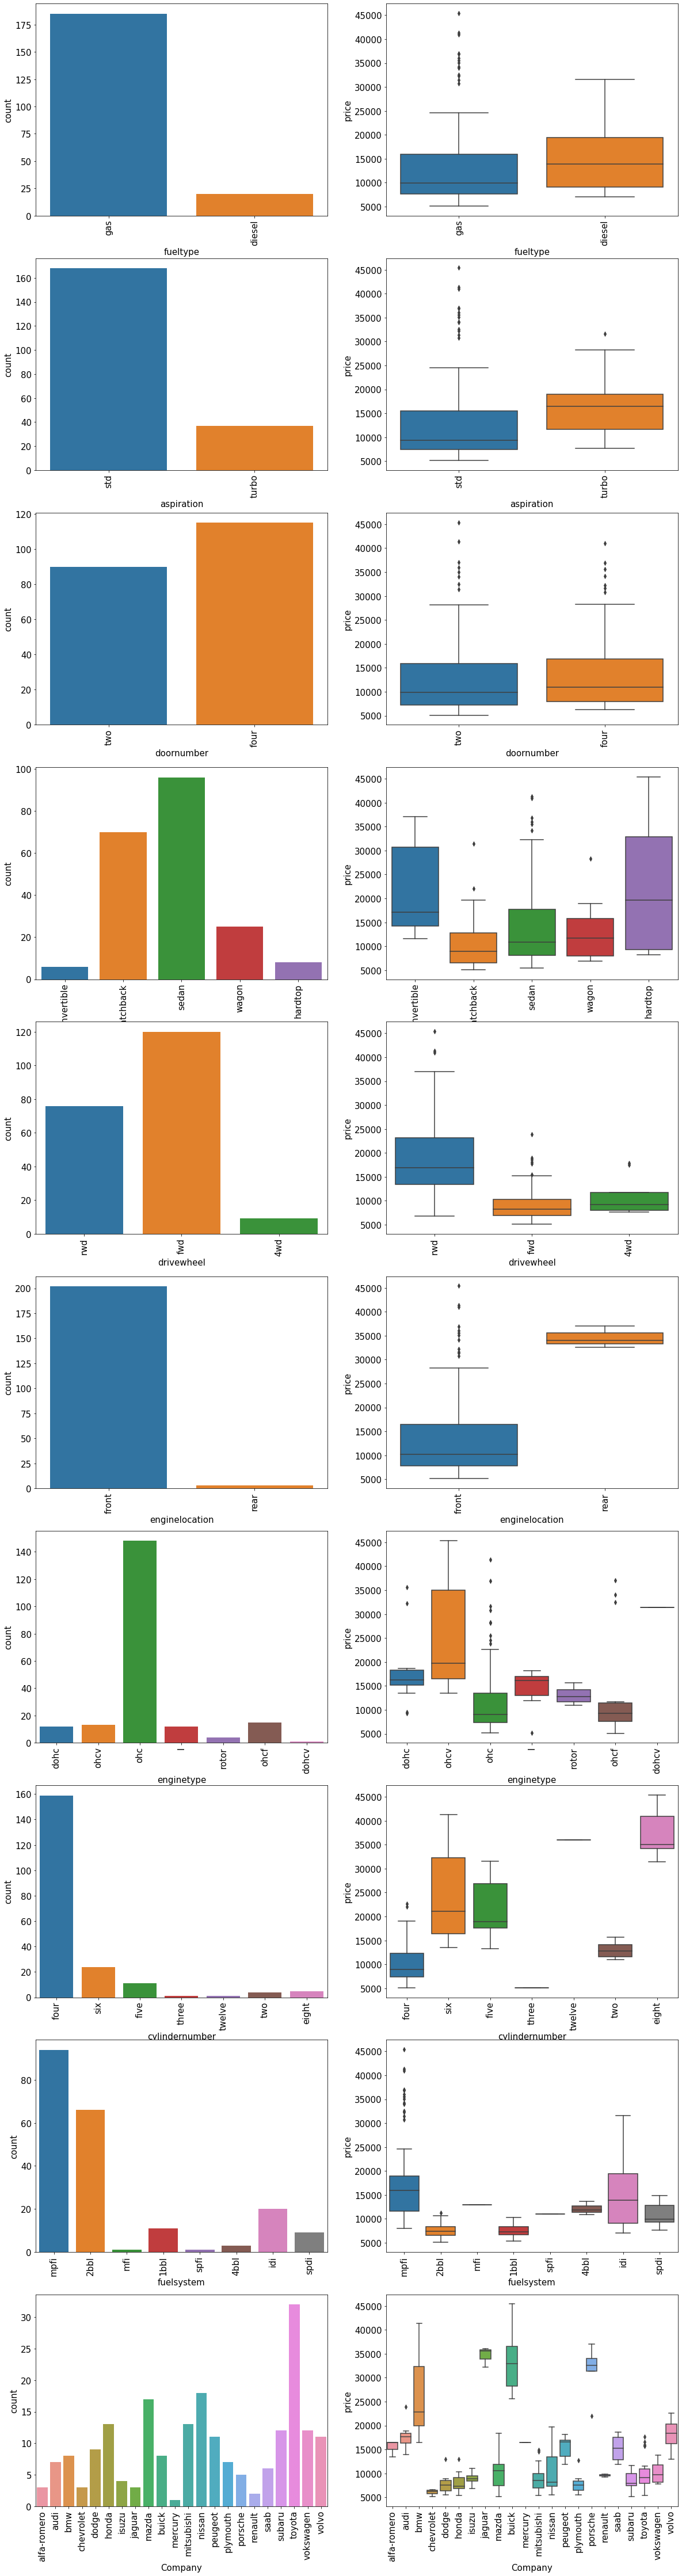

In [ ]:
#Plotting the Dataset for cat_cols
i=1
plt.figure(figsize=(20,80))
for col in cat_cols:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)

    i+=1
    plt.subplot(10,2,i)
    sns.boxplot(x=df[col],y=df['price'])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('price', fontsize=15)
    i+=1
plt.show()

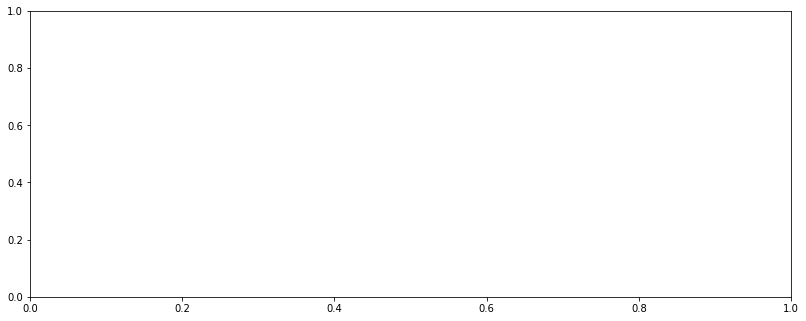

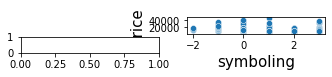

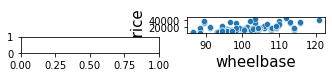

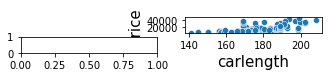

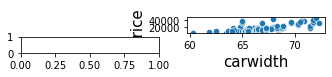

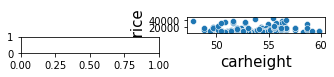

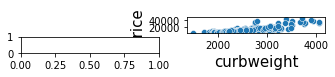

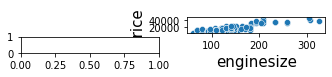

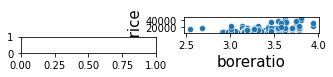

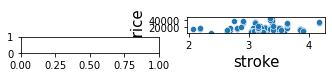

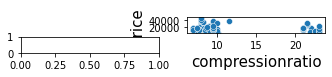

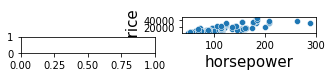

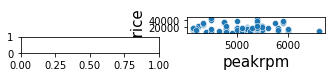

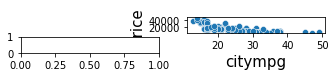

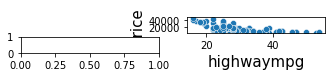

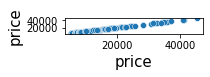

In [ ]:
#Plotting the Dataset for num_cols
i=1
plt.figure(figsize=(30,100))
for col in num_cols:
    plt.subplot(16,2,i)
    sns.displot(df[col])
    plt.ylabel(col,fontsize=15)
    plt.xticks(fontsize=10)
    i+=1

    plt.subplot(16,2,i)
    sns.scatterplot(x=df[col],y=df['price'])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('price', fontsize=15)
    i+=1

In [ ]:
df.drop('symboling', axis=1, inplace=True)
num_cols.remove("symboling")
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


**Splitting dataset & training the model**
Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le =LabelEncoder()

In [ ]:
df[cat_cols]=df[cat_cols].apply(lambda x:Le.fit_transform(x))

In [ ]:
df[cat_cols].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,1,0,1,0,2,0,0,2,5,0
1,1,0,1,0,2,0,0,2,5,0
2,1,0,1,2,2,0,5,3,5,0
3,1,0,0,3,1,0,3,2,5,1
4,1,0,0,3,0,0,3,1,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int64  
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

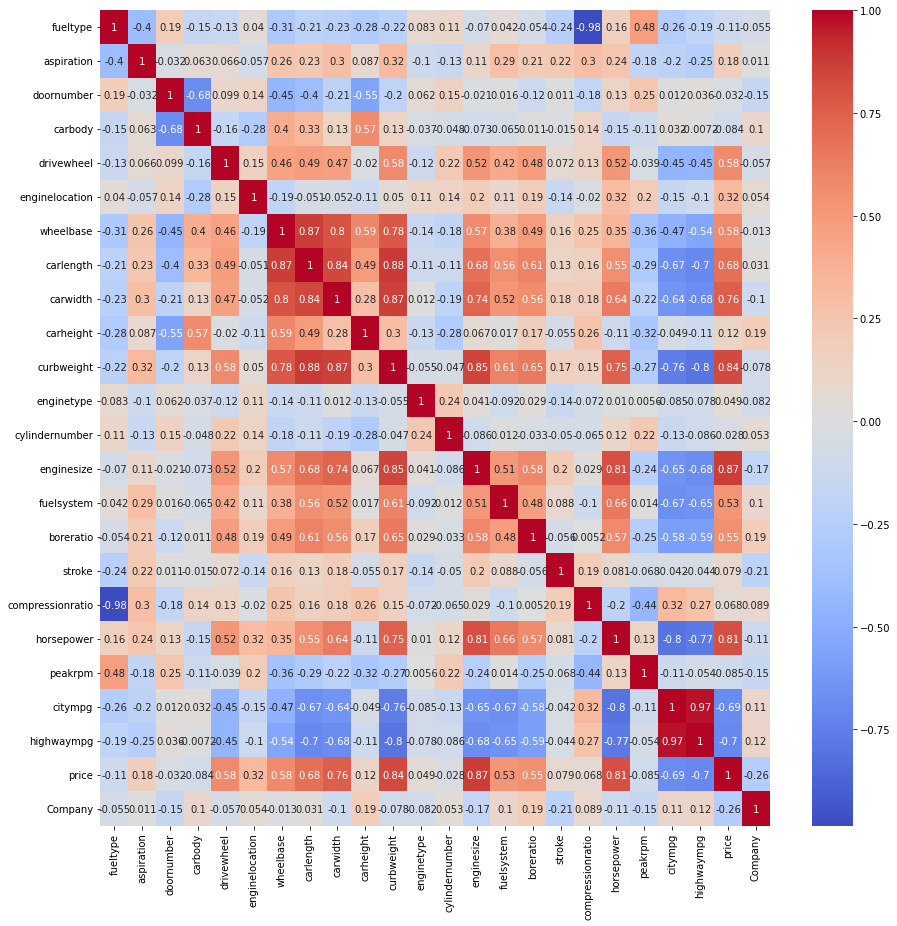

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.show()

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS=StandardScaler()

In [ ]:
df[num_cols]=SS.fit_transform(df[num_cols])

In [ ]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,0
1,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,0
2,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,5,3,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,0
3,1,0,0,3,1,0,0.173698,0.207256,0.136542,0.235942,-0.420797,3,2,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,1
4,1,0,0,3,0,0,0.107110,0.207256,0.230001,0.235942,0.516807,3,1,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,1


**Spliting dataset into X and Y**

In [ ]:
x=df.drop(['price'], axis=1)
y=df['price']

In [ ]:
x.head(6)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Company
0,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0
1,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0
2,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,5,3,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0
3,1,0,0,3,1,0,0.173698,0.207256,0.136542,0.235942,-0.420797,3,2,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,1
4,1,0,0,3,0,0,0.107110,0.207256,0.230001,0.235942,0.516807,3,1,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,1
5,1,0,1,3,1,0,0.173698,0.264133,0.183272,-0.256354,-0.093502,3,1,0.218885,5,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,1


In [ ]:
y.head()

0    0.027391
1    0.404461
2    0.404461
3    0.084485
4    0.523668
Name: price, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

Linear Regression

In [ ]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.8463122094668132


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.8990512041931975


In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.9557283160352529


In [ ]:
Xgb=XGBRegressor()
Xgb.fit(x_train,y_train)
y_pred=Xgb.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

[14:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9226879165957799
